# Example 12.2: Joule-Thomson Coefficient

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
Estimate the Joule-Thomson coefficient for R-134a at $80^\circ\mathrm{C}$ and $200\ \mathrm{kPa}$

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.default import *
import numpy as np
   
ref = realfluid.Properties('R134a')

In [2]:
%%showcalc
# State of interest
p['A'] = Quantity(200,'kPa')
T['A'] = Quantity(80,'degC')
states.fix('A',ref)

# Forward state
p['B'] = Quantity(240,'kPa')
h['B'] = h['A']
states.fix('B',ref)

# Backward state
p['C'] = Quantity(180,'kPa')
h['C'] = h['A']
states.fix('C',ref)

# Forward Difference
dTdp_h_forward = (T['B']-T['A'])/(p['B']-p['A'])

# Backward Difference
dTdp_h_backward = (T['C']-T['A'])/(p['C']-p['A'])

# Central Difference
dTdp_h_central = (T['B']-T['C'])/(p['B']-p['C'])

 State of interest

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Forward state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Backward state

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Forward Difference

<IPython.core.display.Latex object>

 Backward Difference

<IPython.core.display.Latex object>

 Central Difference

<IPython.core.display.Latex object>

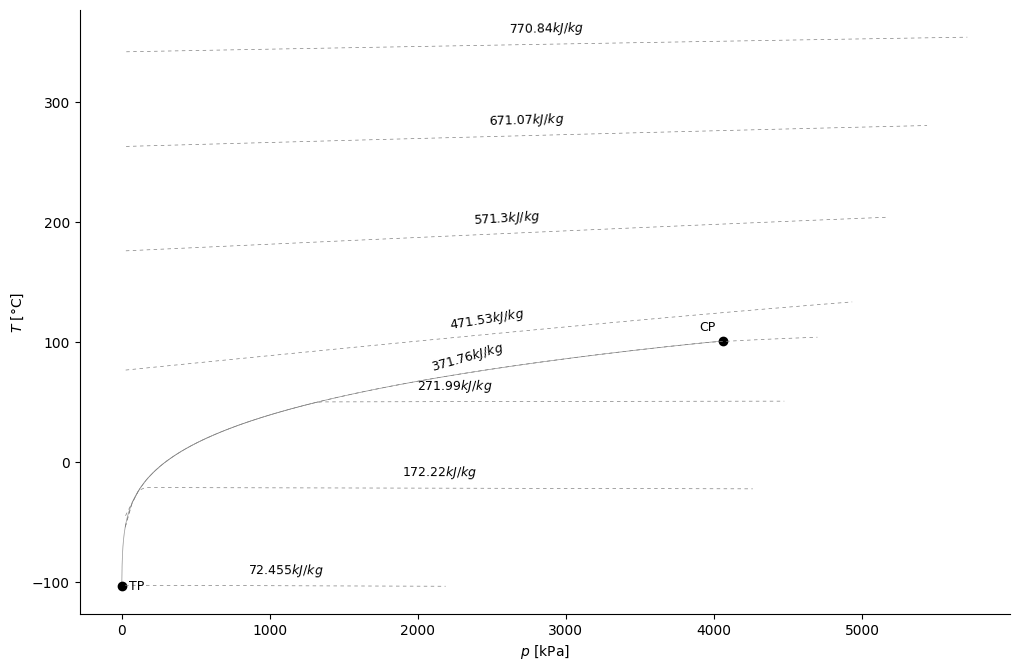

In [3]:
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*3
for i in np.arange(h_min+1,h_max,(h_max-h_min)/11):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

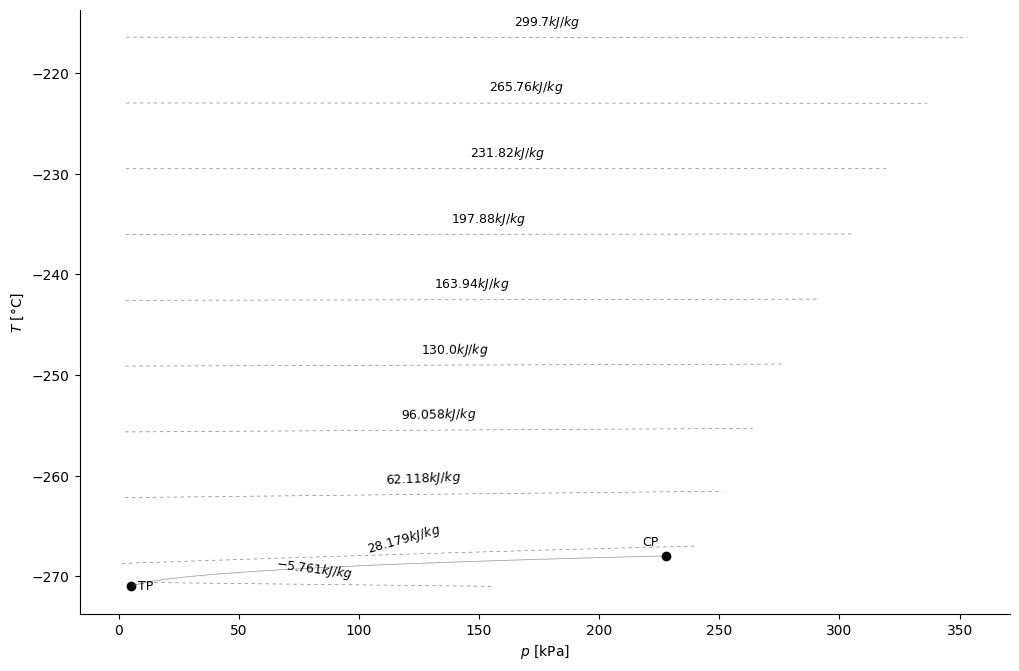

In [4]:
ref = realfluid.Properties('helium')
Tp = ref.property_diagram(x='p',y='T')
Tp.plot_triple_point()
Tp.plot_critical_point()

h_min = ref.h(T=ref.T_triple,x=0).magnitude
h_max = ref.h(T=ref.T_critical,x=0).magnitude*30
for i in np.arange(h_min+1,h_max,(h_max-h_min)/10):  
    try:
        Tp.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False,pos=.5)
    except:
        break

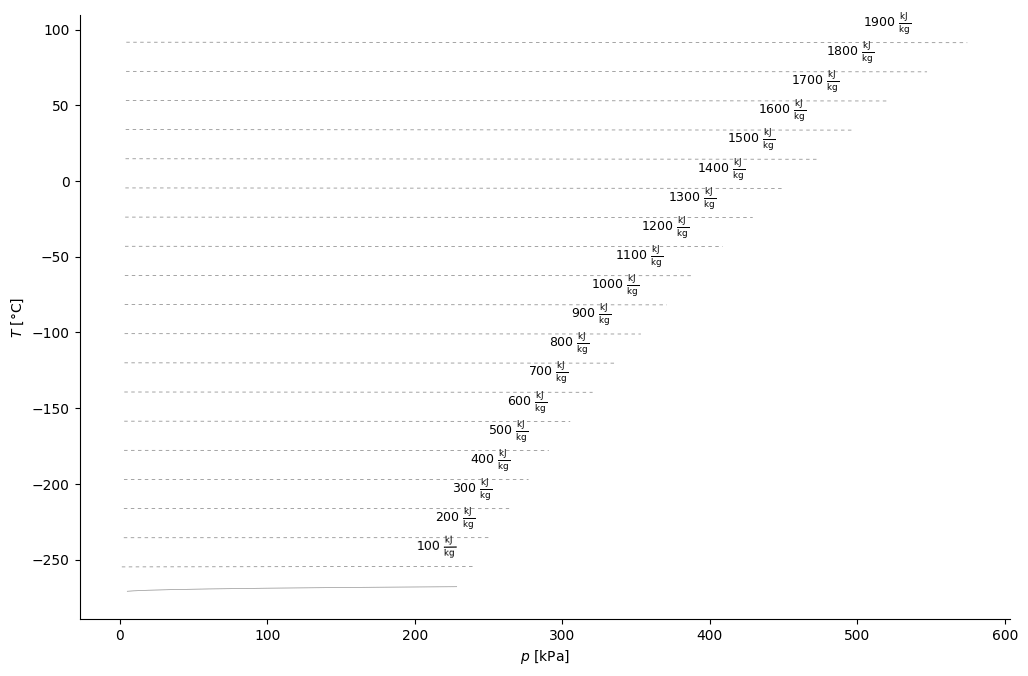

In [5]:
plt = ref.property_diagram(x='p',y='T')

for i in range(100,2000,100):
    try:
        plt.plot_isenthalp(Quantity(i,'kJ/kg'),preserve_limits=False)
    except:
        break